#Machineknight Hackathon
#(Predicting House Rent)

## Importing Libraries

In [1]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#installing required library
!pip install sweetviz 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 5.1 MB/s 


In [7]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sweetviz 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
%matplotlib inline

## Data Cleaning and EDA


In [4]:
#reading the train and test dataset
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machineknight_Hackathon/data/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machineknight_Hackathon/data/test.csv")

### Auto EDA using sweetviz

In [85]:
#peeking at the train data
train.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,"Cauvery Colony,Koramangala",21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2,E,2,6,12,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2,40000
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,09-10-2017 12:48,12.929557,77.672280,ANYONE,0,1,0,...,2,NE,2,3,4,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2,22000
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,12-06-2018 22:02,12.982870,80.262012,FAMILY,0,1,0,...,3,E,3,1,5,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3,28000
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1,E,1,1,2,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0,8000
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3,E,4,0,0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1,45000


In [86]:
#checking the data types of train set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20500 entries, 0 to 20499
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20500 non-null  object 
 1   type             20500 non-null  object 
 2   locality         20500 non-null  object 
 3   activation_date  20500 non-null  object 
 4   latitude         20500 non-null  float64
 5   longitude        20500 non-null  float64
 6   lease_type       20500 non-null  object 
 7   gym              20500 non-null  int64  
 8   lift             20500 non-null  int64  
 9   swimming_pool    20500 non-null  int64  
 10  negotiable       20500 non-null  int64  
 11  furnishing       20500 non-null  object 
 12  parking          20500 non-null  object 
 13  property_size    20500 non-null  int64  
 14  property_age     20500 non-null  int64  
 15  bathroom         20500 non-null  int64  
 16  facing           20500 non-null  object 
 17  cup_board   

In [87]:
#plotting the latitude and longitude

fig = px.scatter_mapbox(
    train,  # Our DataFrame
    lat="latitude",
    lon="longitude",
    center={"lat": 12.97, "lon": 77.5867},  # Map will be centered on Mexico City
    width=600,  # Width of map
    height=600,  # Height of map
    hover_data=["rent"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

                                             |          | [  0%]   00:00 -> (? left)


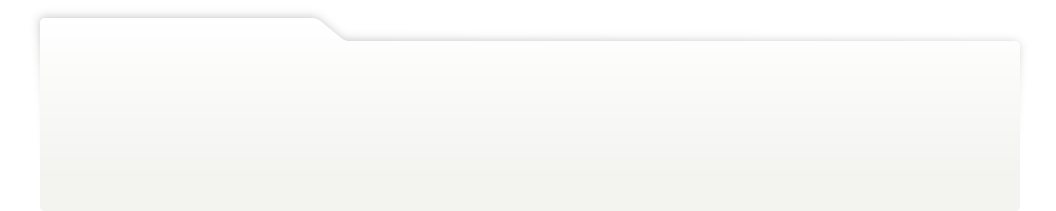
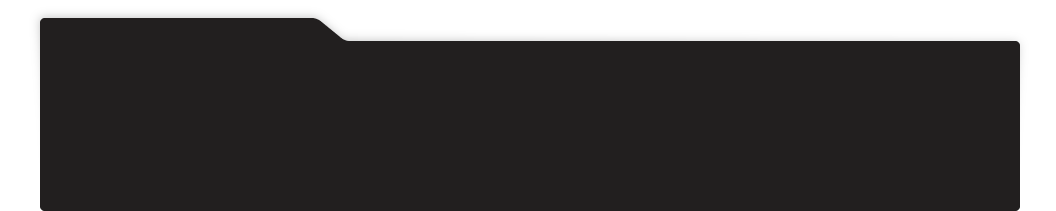
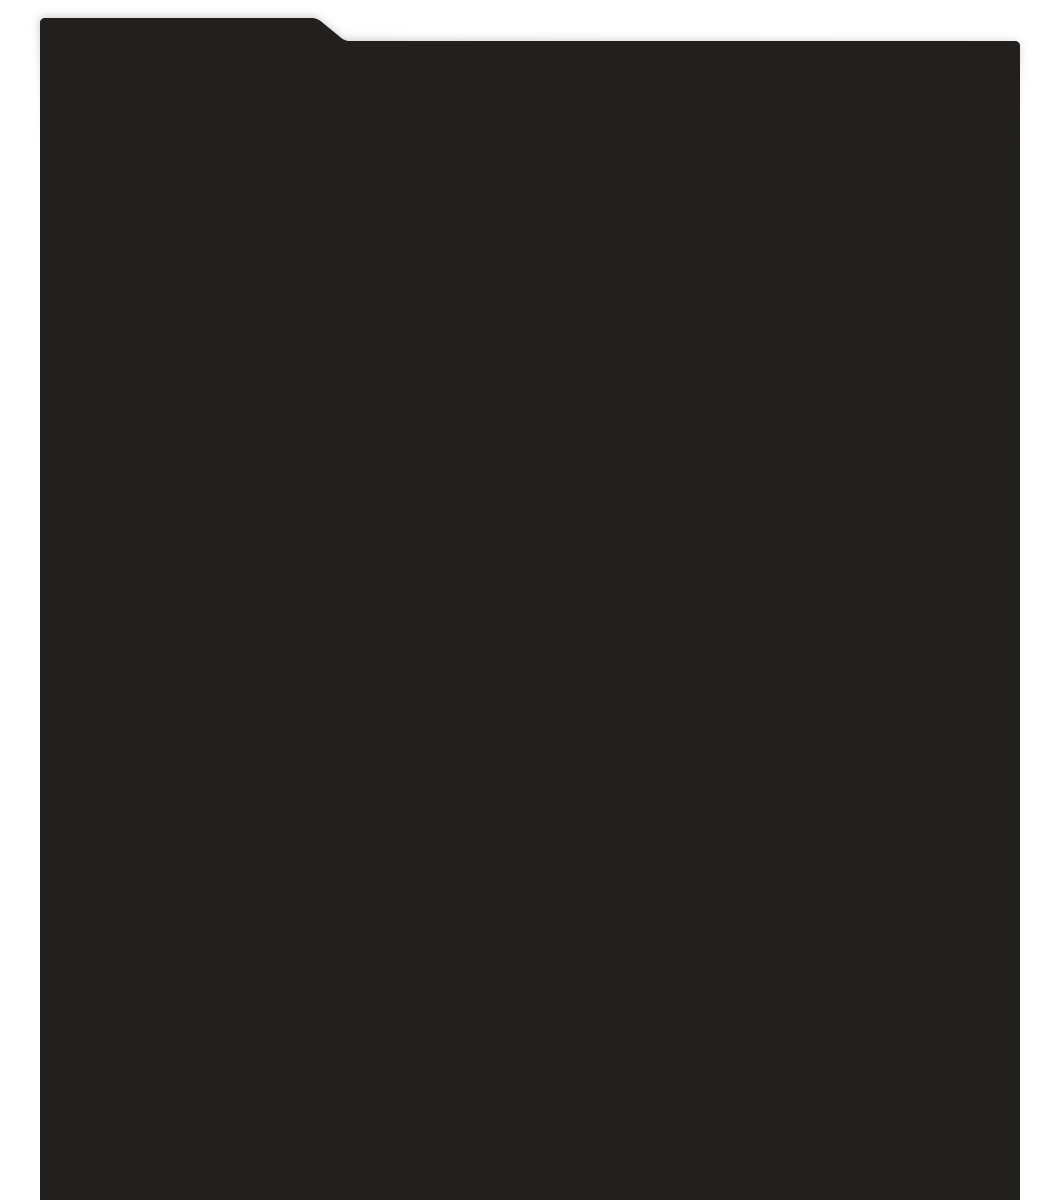
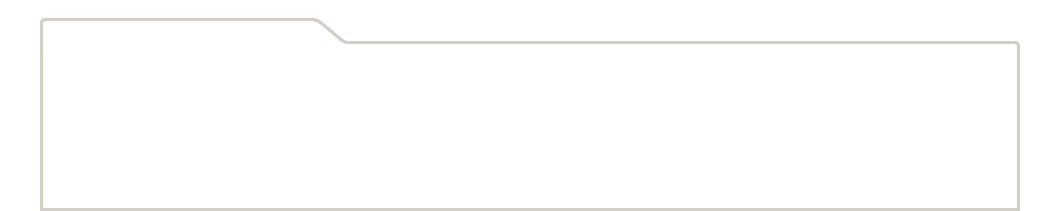
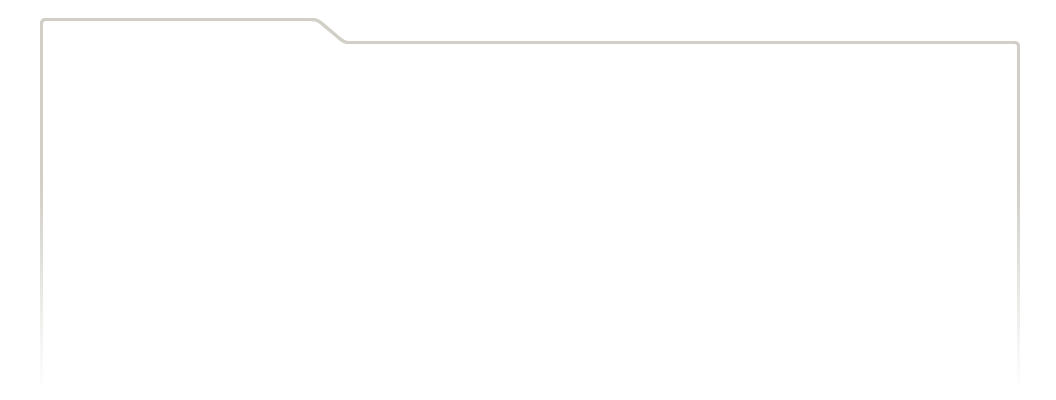
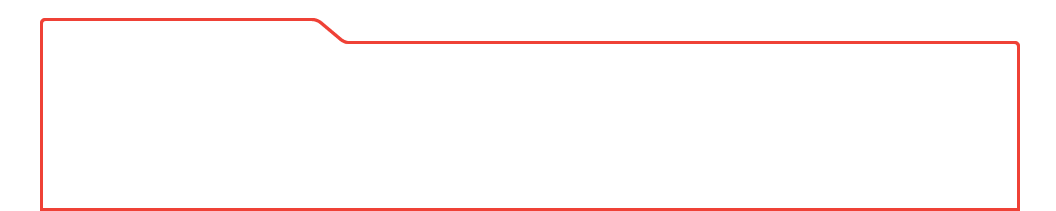
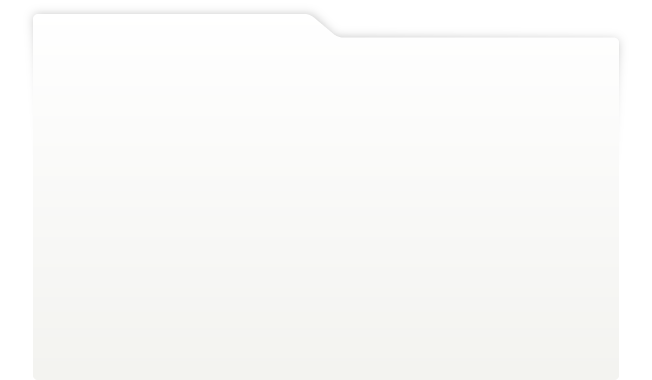
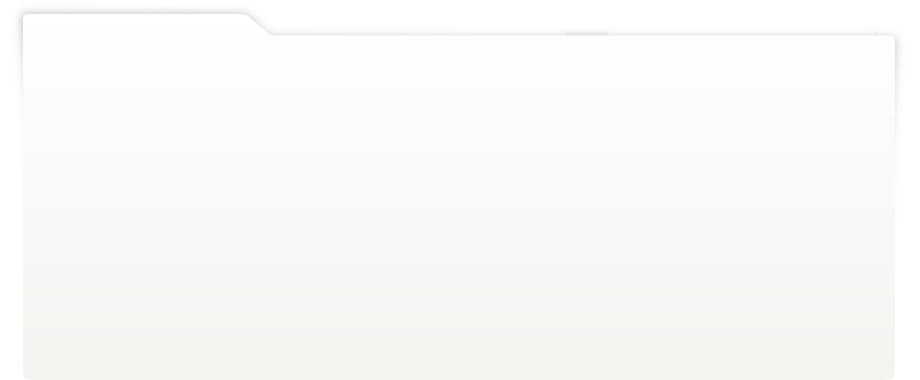
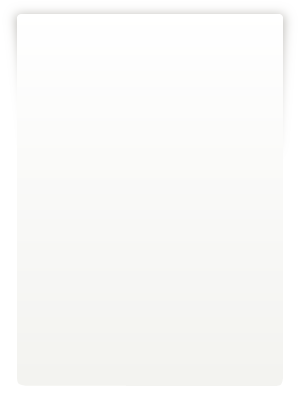
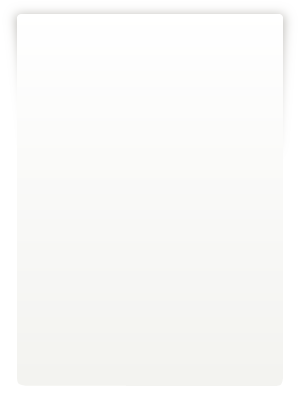
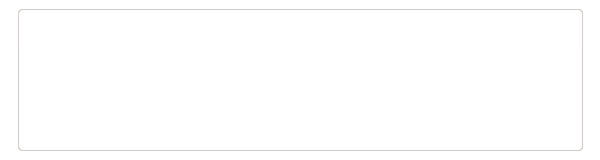
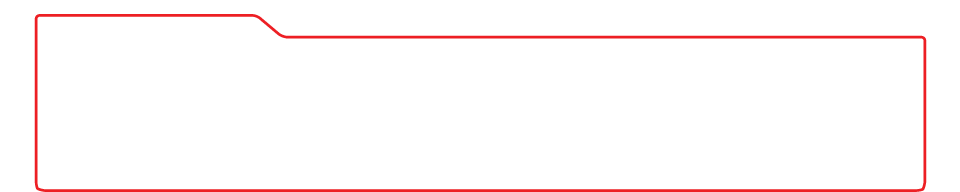
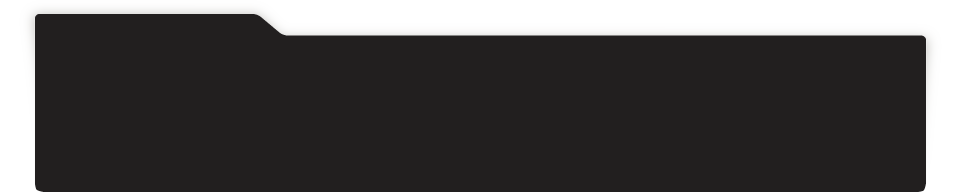
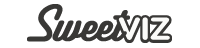
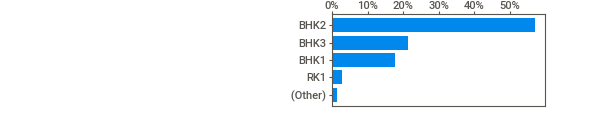
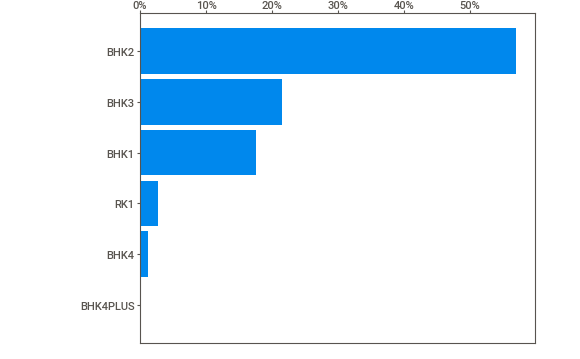
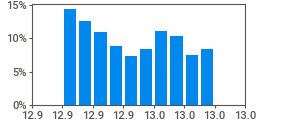
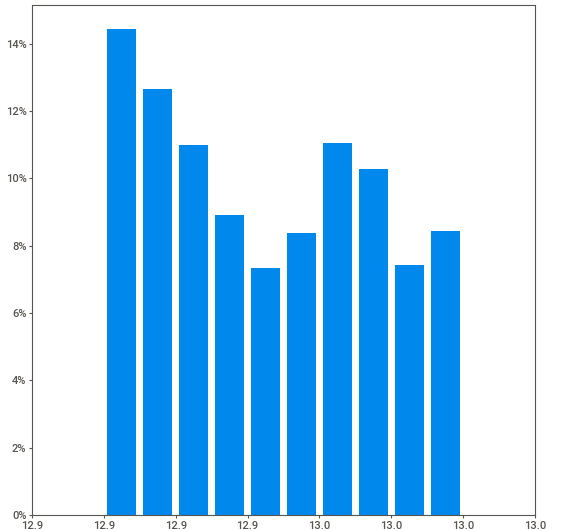
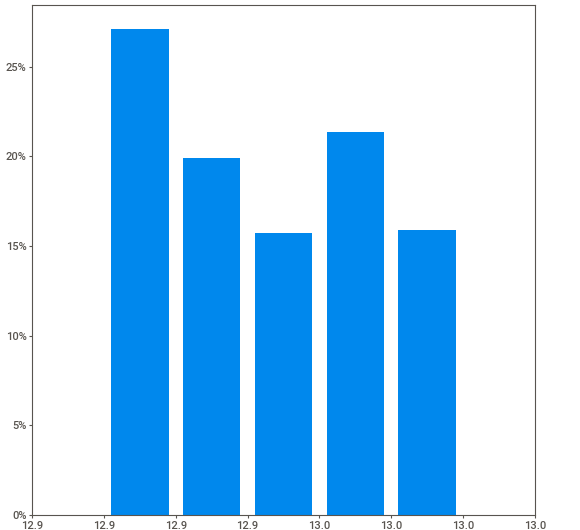
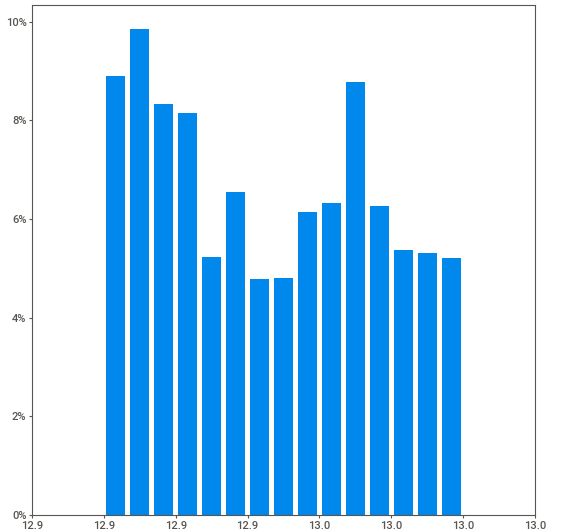
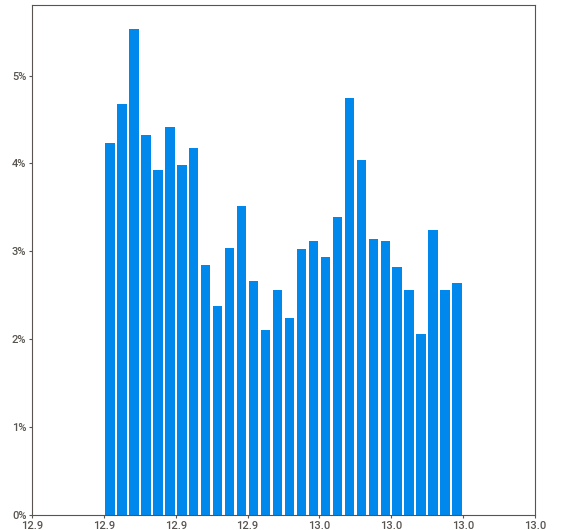
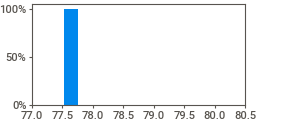
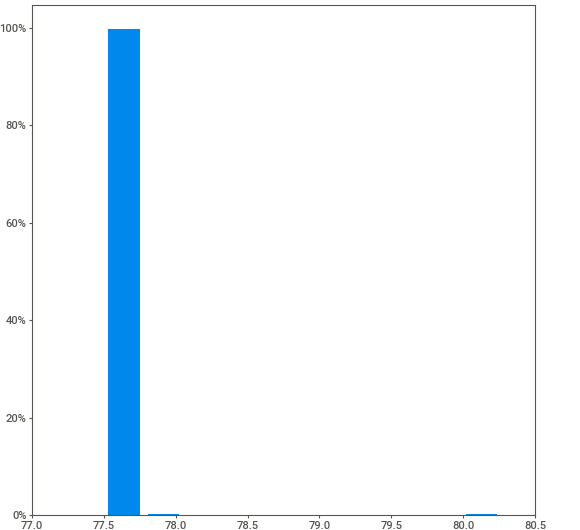
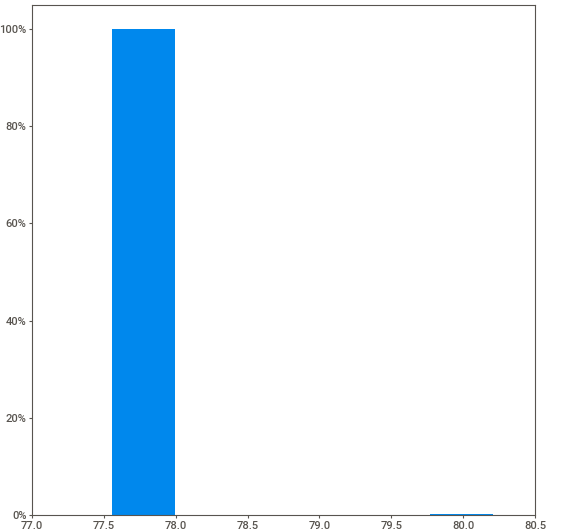
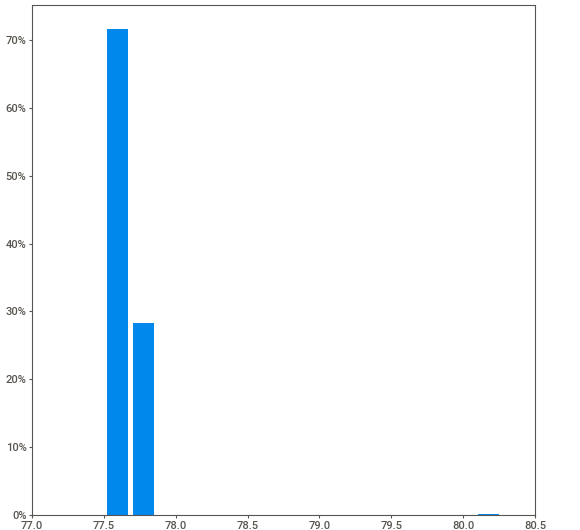
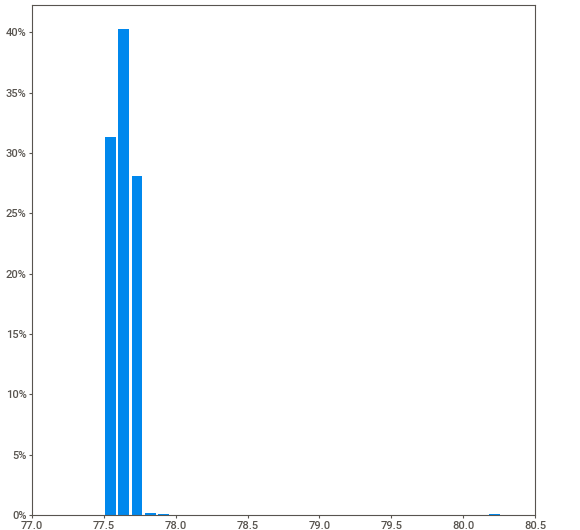
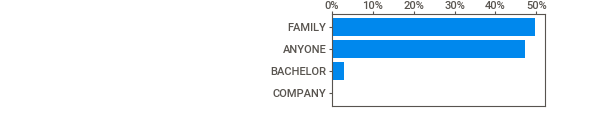
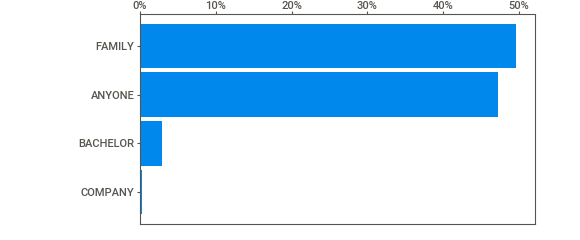
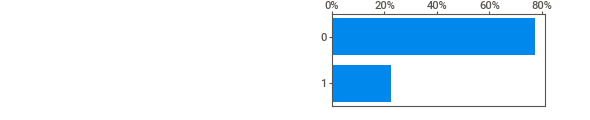
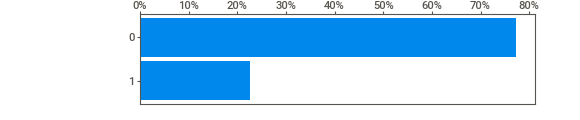
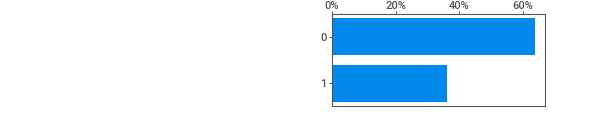
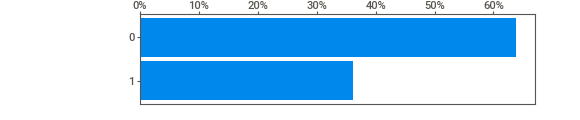
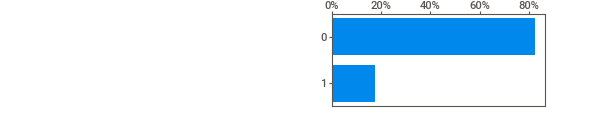
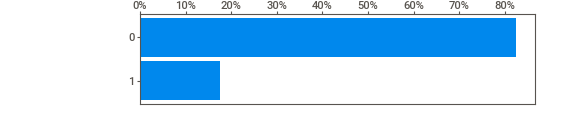
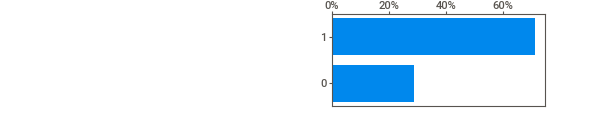
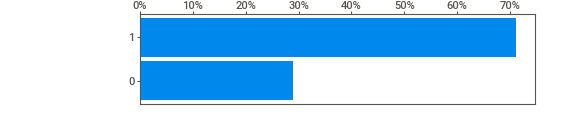
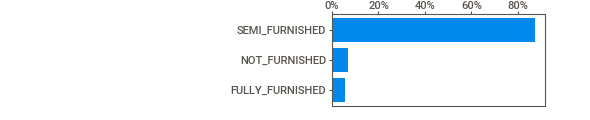
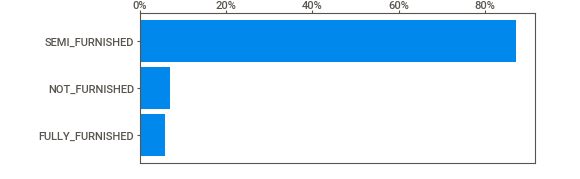
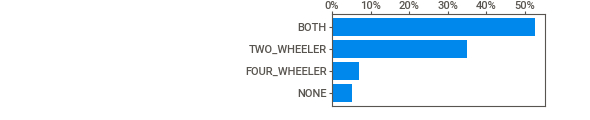
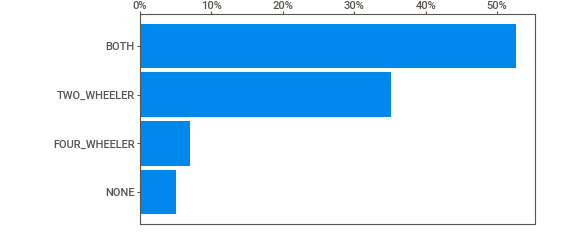
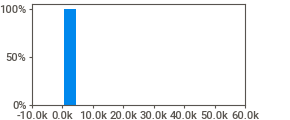
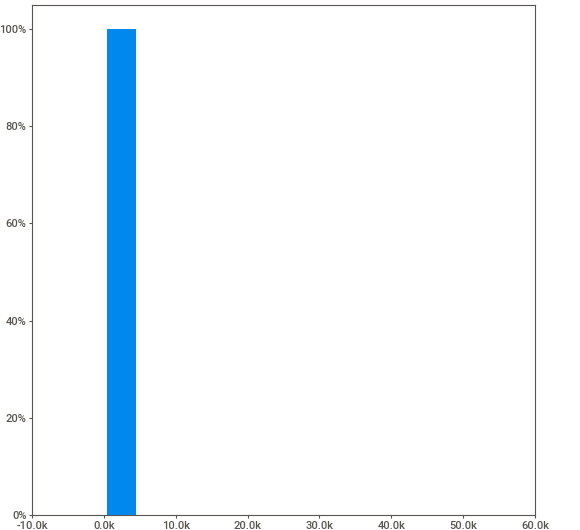
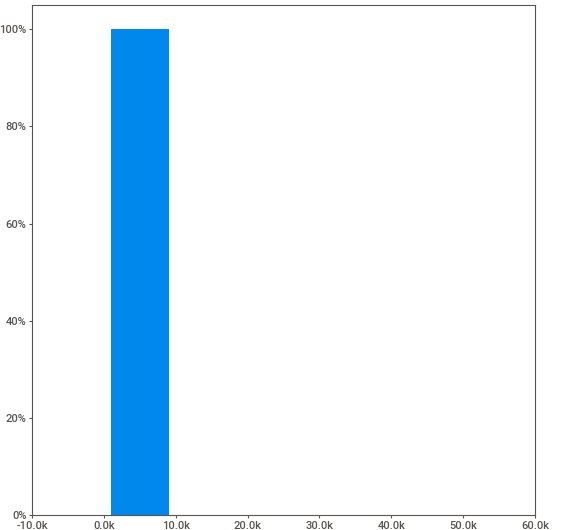
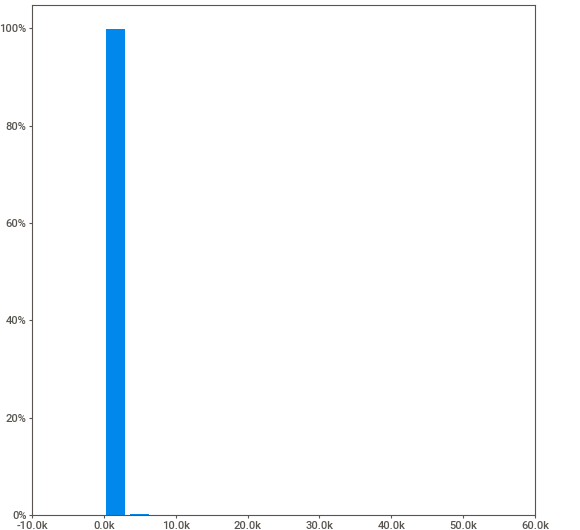
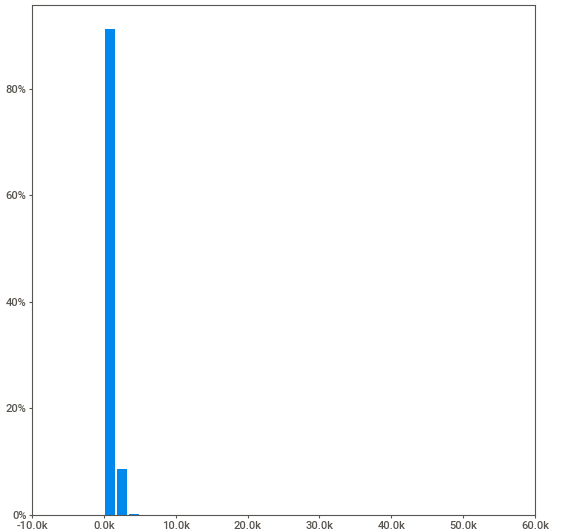
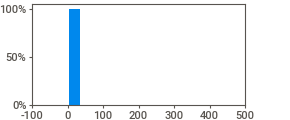
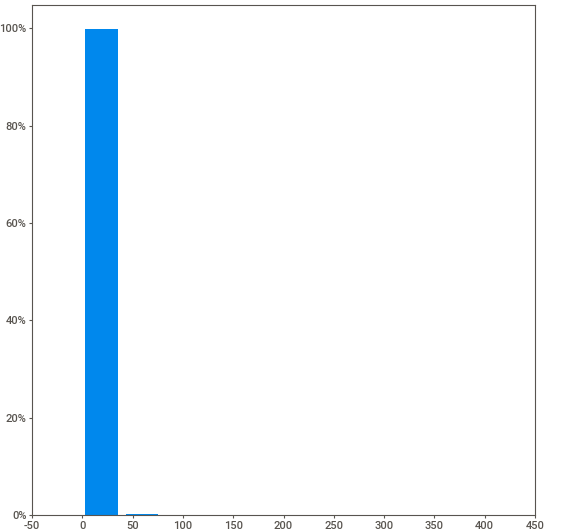
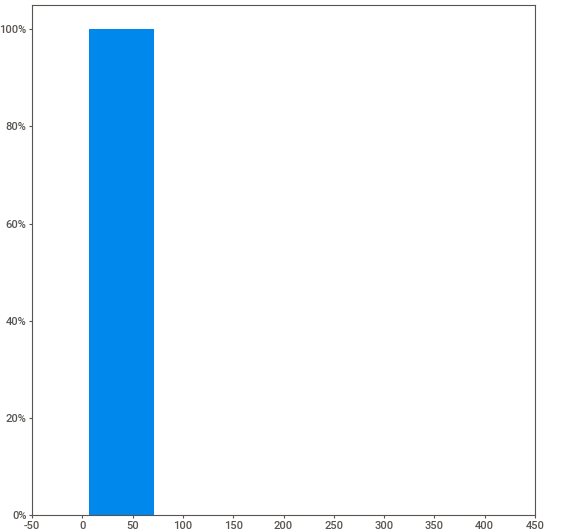
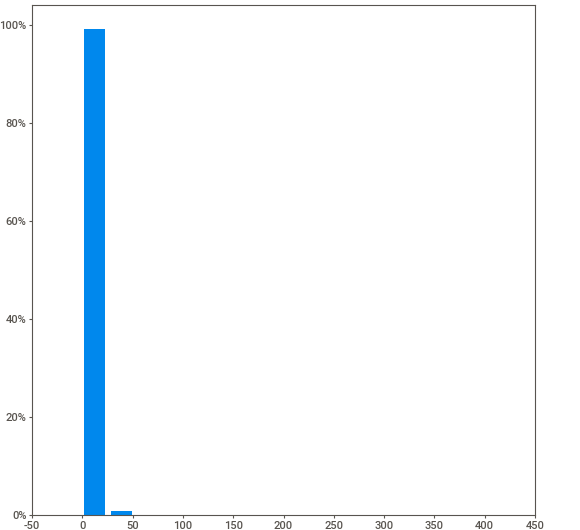
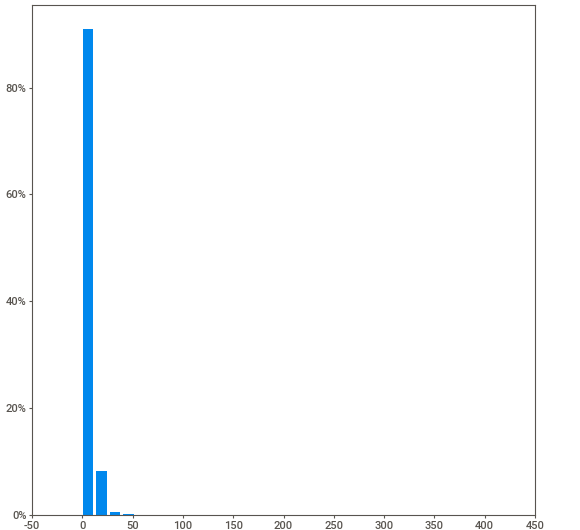
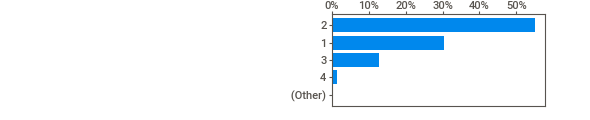
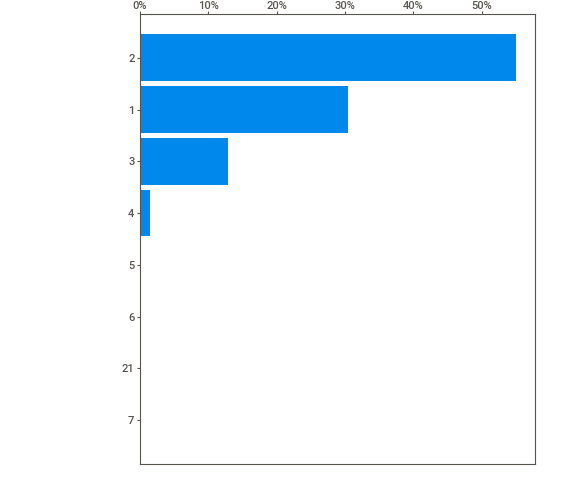
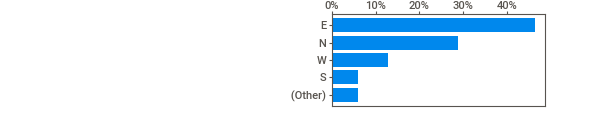
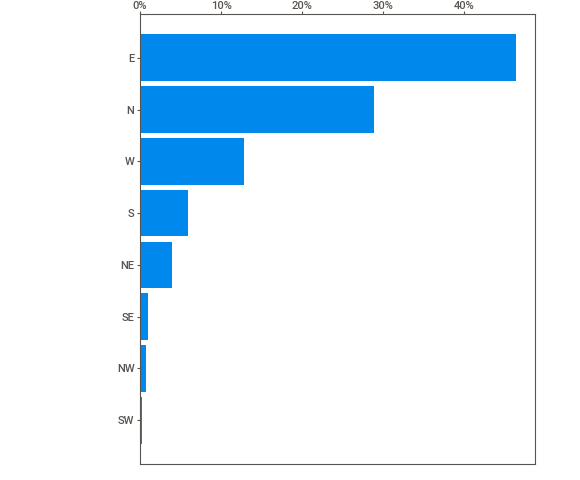
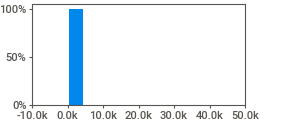
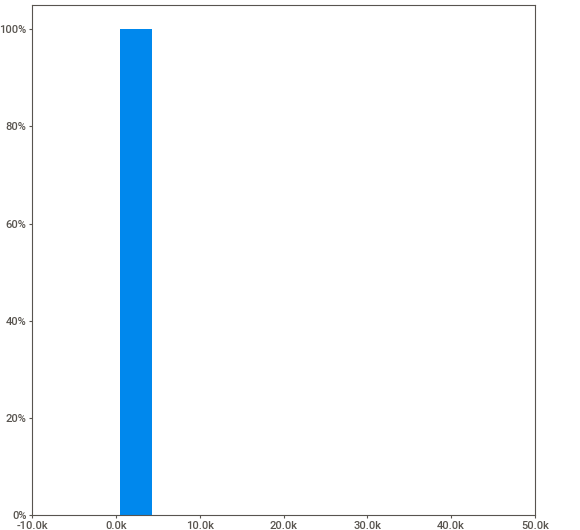
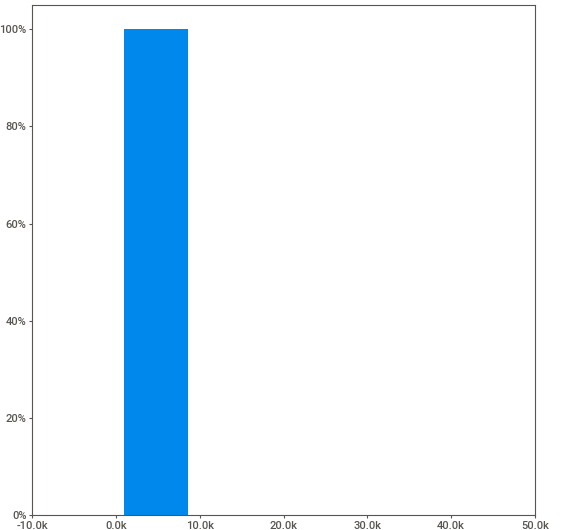
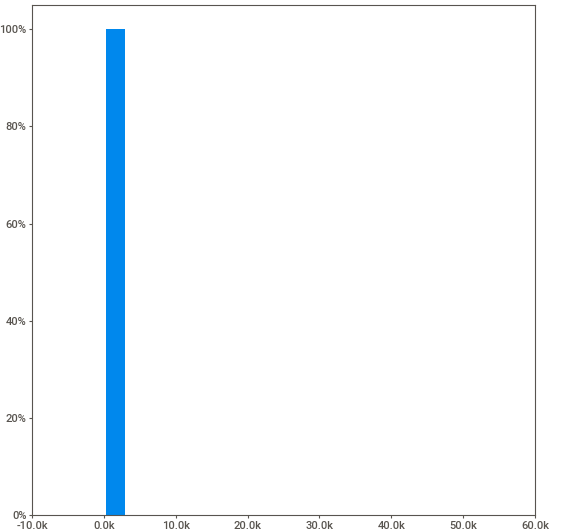
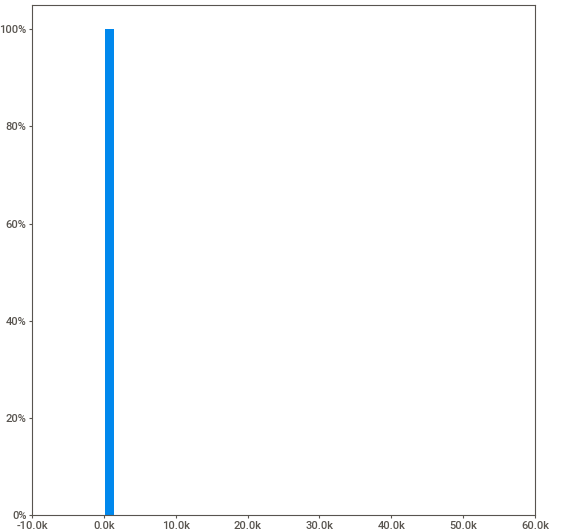
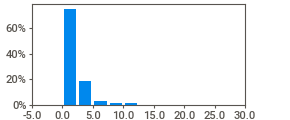
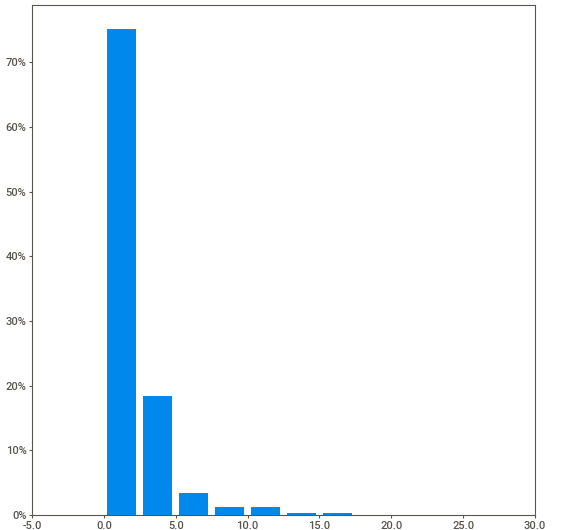
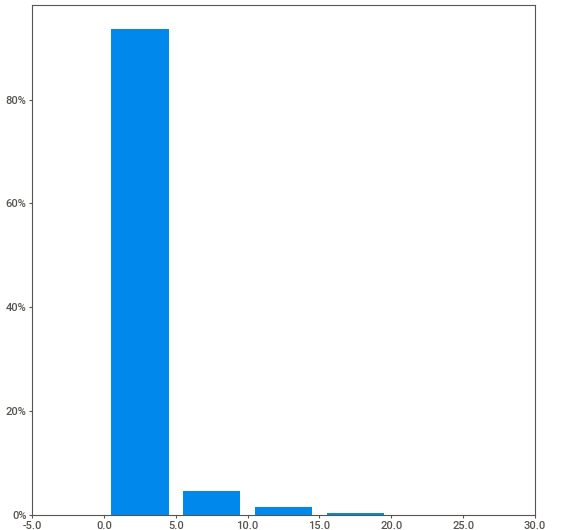
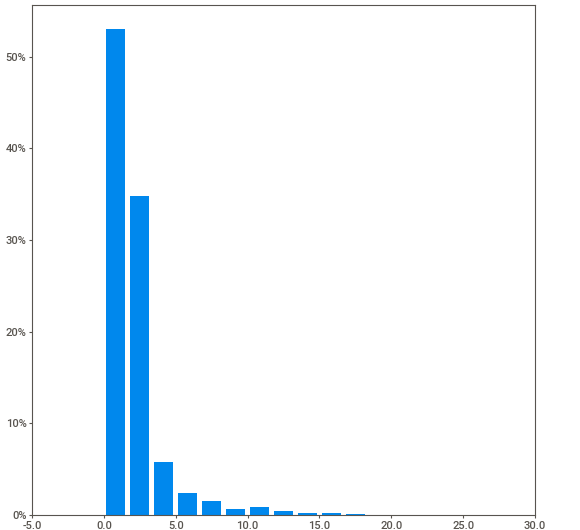
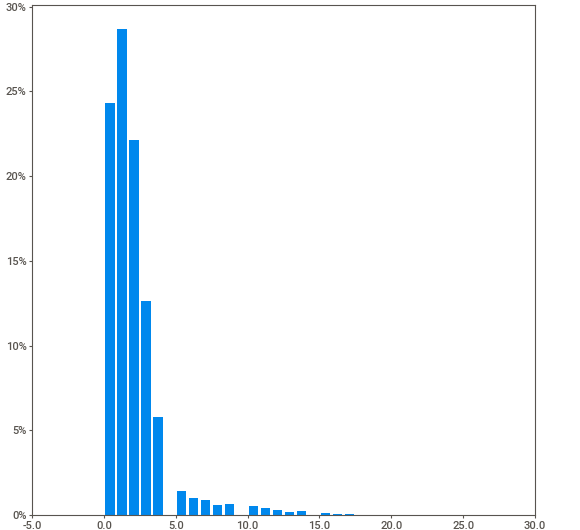
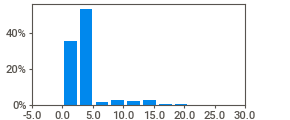
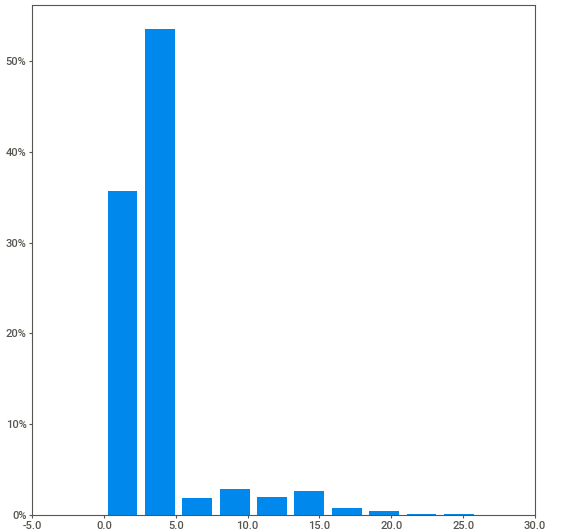
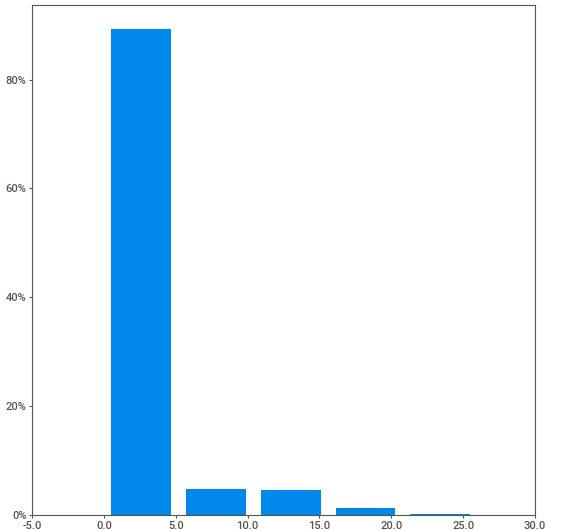
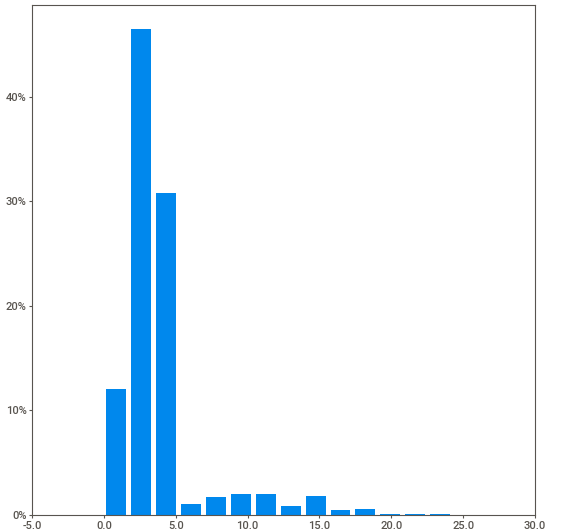
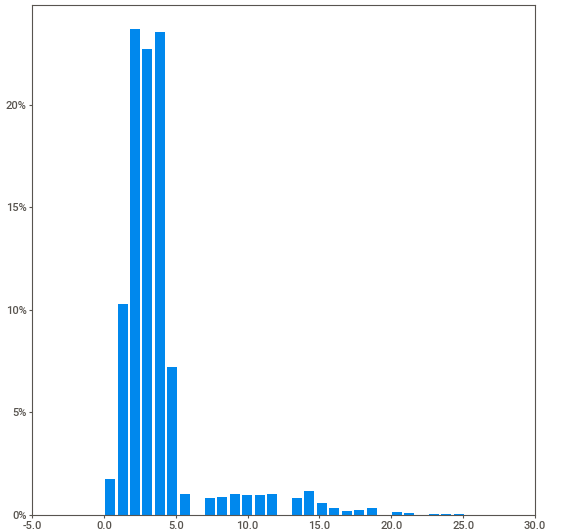
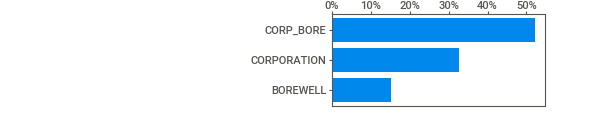
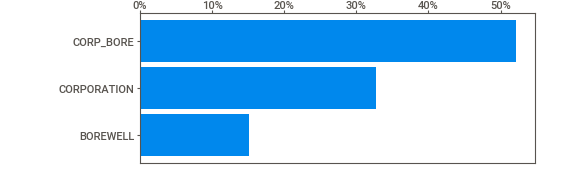
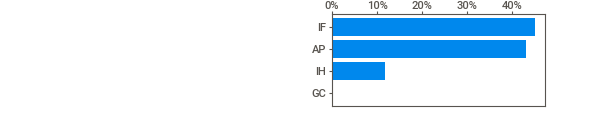
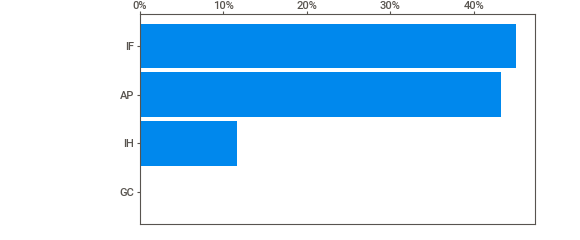
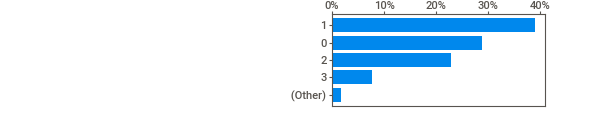
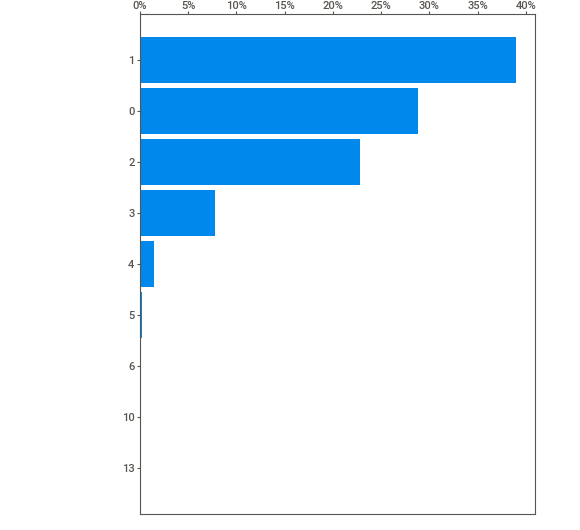
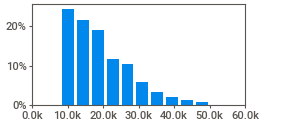
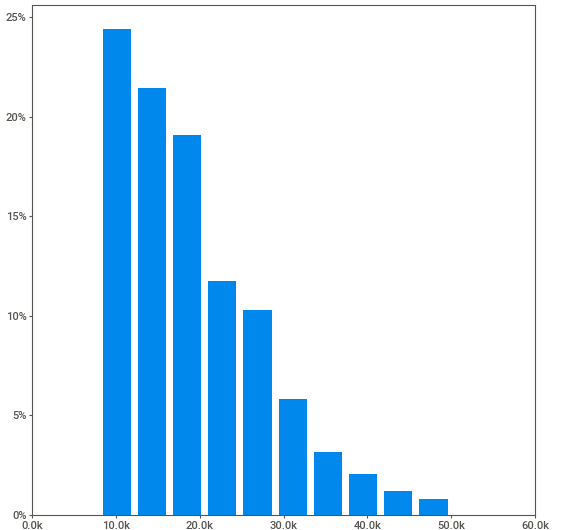
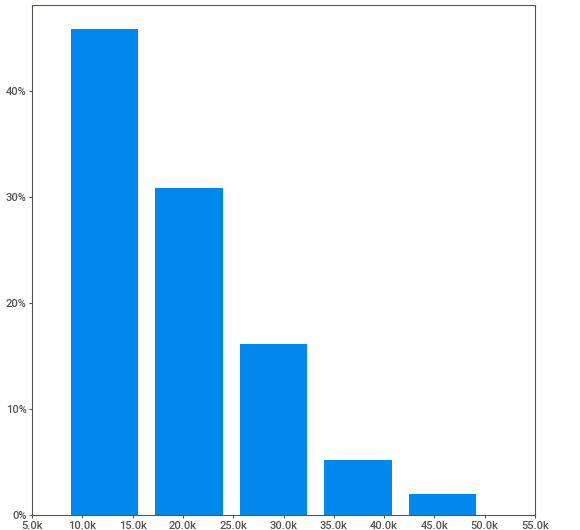
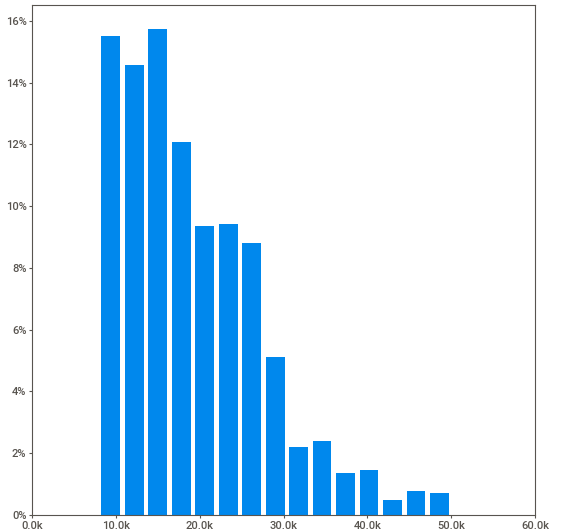
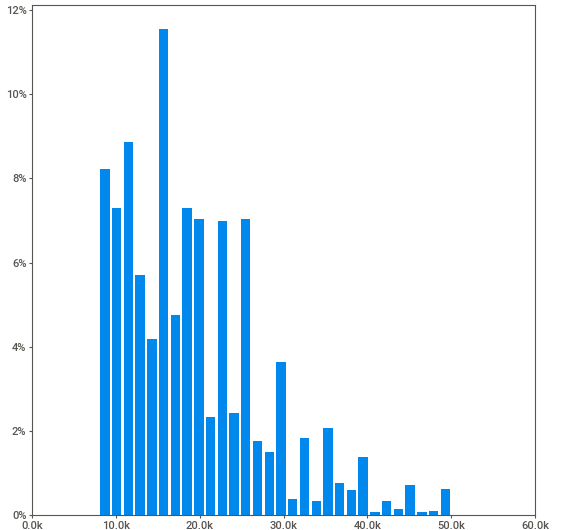
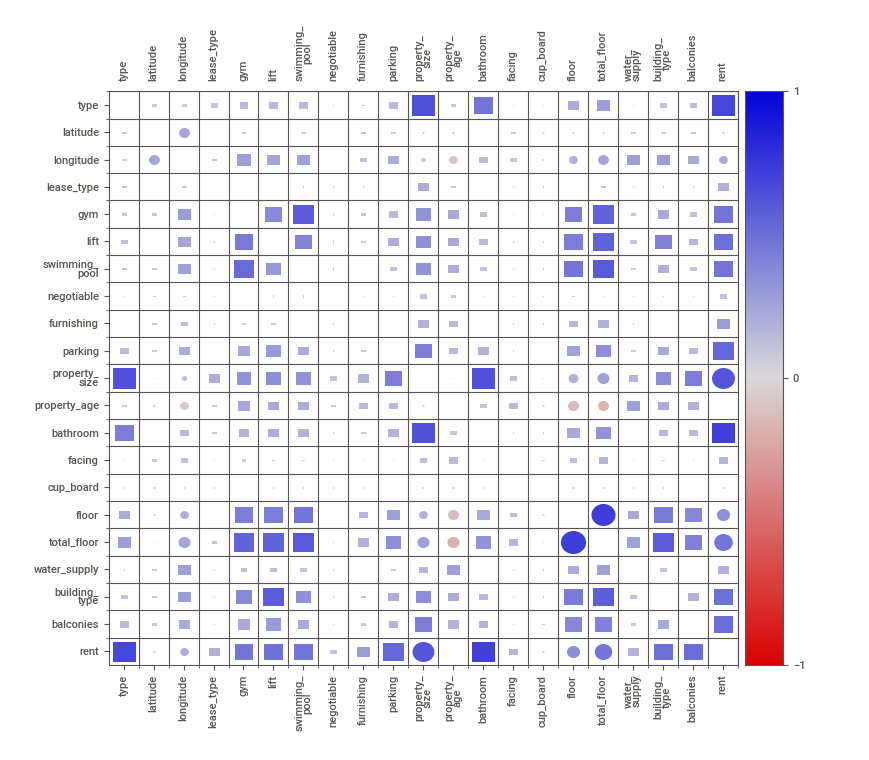
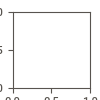

In [88]:
#autoEDA using sweetviz
autoEDA = sweetviz.analyze(train.drop('amenities',axis=1))
autoEDA.show_notebook()

### Bespoke EDA

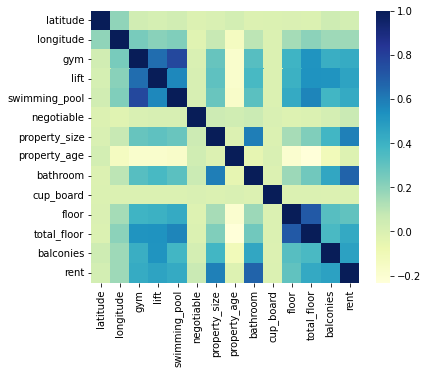

In [8]:
#Checking corelation of columns
plt.figure(figsize=(6,5))
data = train.drop(['id','activation_date','amenities'],axis=1)
sns.heatmap(data.corr(), cmap="YlGnBu")
plt.show()

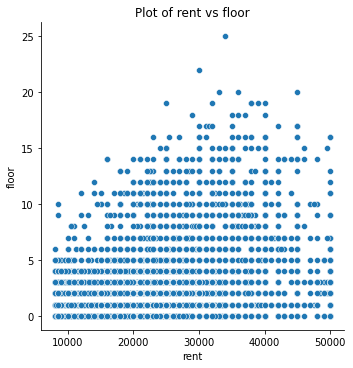

In [10]:
sns.relplot(x = 'rent', y = 'floor', data = train)
plt.title("Plot of rent vs floor")
plt.show()

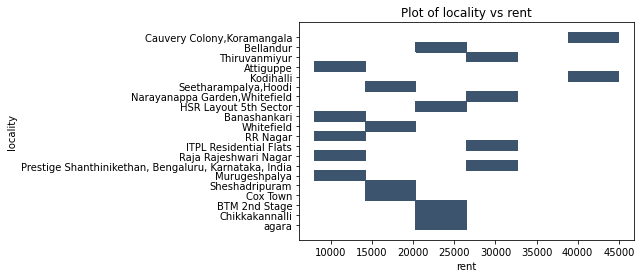

In [11]:
z = train.head(20)
sns.histplot(x = 'rent', y = 'locality', data = z)
plt.title("Plot of locality vs rent")
plt.show()

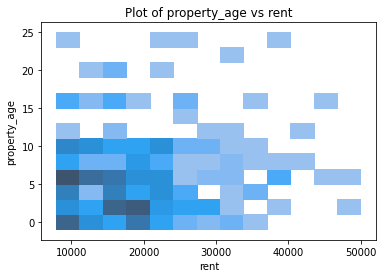

In [12]:
p=train.head(305)
sns.histplot(x = 'rent', y = 'property_age', data = p)
plt.title("Plot of property_age vs rent")
plt.show()

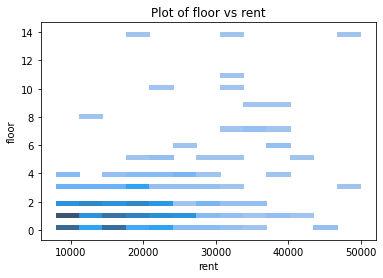

In [13]:
sns.histplot(x = 'rent', y = 'floor', data = p)
plt.title("Plot of floor vs rent")
plt.show()

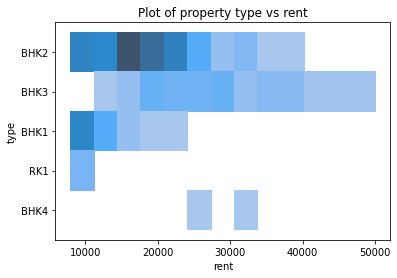

In [14]:
sns.histplot(x = 'rent', y = 'type', data = p)
plt.title("Plot of property type vs rent")
plt.show()

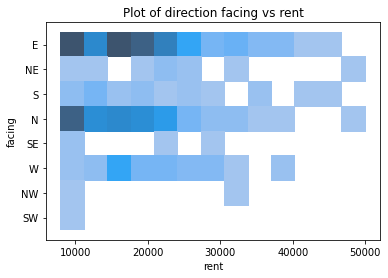

In [15]:
sns.histplot(x = 'rent', y = 'facing', data = p)
plt.title("Plot of direction facing vs rent")
plt.show()

In [90]:
#checking for duplicate values
train.id.duplicated().sum()     #no duplicate values

0

In [91]:
#checking for null values
display(train.isna().sum()) #no null values


id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
dtype: int64

### Data Cleaning and preprocessing

In [92]:
#dropping columns with high cardinality and target variable
df = train.drop(['id','activation_date','amenities','rent','locality'],axis=1)
df1 = test.drop(['id','activation_date','amenities','locality'],axis=1) #dropping columns from test dataset
df.head().T

,0,1,2,3,4
type,BHK2,BHK2,BHK3,BHK1,BHK3
latitude,12.934471,12.929557,12.98287,12.955991,12.963903
longitude,77.634471,77.67228,80.262012,77.531634,77.649446
lease_type,FAMILY,ANYONE,FAMILY,FAMILY,FAMILY
gym,1,0,0,0,0
lift,1,1,1,0,0
swimming_pool,1,0,0,0,0
negotiable,0,1,0,1,1
furnishing,SEMI_FURNISHED,SEMI_FURNISHED,SEMI_FURNISHED,SEMI_FURNISHED,SEMI_FURNISHED
parking,BOTH,BOTH,BOTH,TWO_WHEELER,BOTH


In [93]:
#displaying columns
df1.columns

Index(['type', 'latitude', 'longitude', 'lease_type', 'gym', 'lift',
       'swimming_pool', 'negotiable', 'furnishing', 'parking', 'property_size',
       'property_age', 'bathroom', 'facing', 'cup_board', 'floor',
       'total_floor', 'water_supply', 'building_type', 'balconies'],
      dtype='object')

In [94]:
#getting categorical values
catcol = list(df.select_dtypes(include=['object']).columns)
print("Categorical values are : " + ", ".join(list(catcol)) )

#label encoding some of the categorical columns

X = pd.concat([df['type'].map({'RK1':0,'BHK1':1,'BHK2':2,'BHK3':3,'BHK4':4,'BHK4PLUS':5}).astype(int),
                df['furnishing'].map({'NOT_FURNISHED':0,'SEMI_FURNISHED':1, 'FULLY_FURNISHED':2}).astype(int)]
           ,axis=1)

X_test = pd.concat([df1['type'].map({'RK1':0,'BHK1':1,'BHK2':2,'BHK3':3,'BHK4':4,'BHK4PLUS':5}).astype(int),
                df1['furnishing'].map({'NOT_FURNISHED':0,'SEMI_FURNISHED':1, 'FULLY_FURNISHED':2}).astype(int)]
           ,axis=1)



catcol.remove('type')
catcol.remove('furnishing')


Categorical values are : type, lease_type, furnishing, parking, facing, water_supply, building_type


In [95]:
#One hot encoding rest of the categorical columns
temp = []
temp1 = []
for cat in catcol:
  temp.append(pd.get_dummies(df[cat]))
  temp1.append(pd.get_dummies(df1[cat]))

X = pd.concat([X] + temp + [df.select_dtypes(include=['int64','float64'])],axis=1 )
X_test = pd.concat([X_test] + temp1 + [df1.select_dtypes(include=['int64','float64'])],axis=1 )
y = train['rent']

In [96]:
#displaying columns
X.columns

Index(['type', 'furnishing', 'ANYONE', 'BACHELOR', 'COMPANY', 'FAMILY', 'BOTH',
       'FOUR_WHEELER', 'NONE', 'TWO_WHEELER', 'E', 'N', 'NE', 'NW', 'S', 'SE',
       'SW', 'W', 'BOREWELL', 'CORPORATION', 'CORP_BORE', 'AP', 'GC', 'IF',
       'IH', 'latitude', 'longitude', 'gym', 'lift', 'swimming_pool',
       'negotiable', 'property_size', 'property_age', 'bathroom', 'cup_board',
       'floor', 'total_floor', 'balconies'],
      dtype='object')

## Scaling and Splitting train data

### Scaling

In [100]:
#scaling train and test data
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

### Splitting train data into train and test sets

In [101]:
#splitting the train data into train and test for training
x_train,x_test,y_train,y_test, = train_test_split(X,y,test_size=0.2,random_state=42)

## Modelling

### Linear Regression

In [ ]:
#linear regression
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)
print("Train RMSE :",mean_squared_error(y_train,model_lr.predict(x_train),squared=False))
print("Test RMSE :",mean_squared_error(y_test,model_lr.predict(x_test),squared=False))
print(model_lr.score(x_train,y_train))
print(model_lr.score(x_test,y_test))

Train RMSE : 4866.534670847918
Test RMSE : 6795.928678124688
0.6692248862822108
0.3327431576373784


### Ridge regressor

In [ ]:
#linear regression with ridge regularization
model_r = Ridge(0.8)
model_r.fit(x_train, y_train)
print("Train RMSE :",mean_squared_error(y_train,model_r.predict(x_train),squared=False))
print("Test RMSE :",mean_squared_error(y_test,model_r.predict(x_test),squared=False))
print("Train R2 score :",model_r.score(x_train,y_train))
print("Test R2 score :",model_r.score(x_test,y_test))

Train RMSE : 4865.655899868644
Test RMSE : 6816.607620794073
Train R2 score : 0.6693443344505664
Test R2 score : 0.32867626421676555


### Lasso Regressor

In [ ]:
model_l = Lasso(.15)
model_l.fit(x_train, y_train)
print("Train RMSE :",mean_squared_error(y_train,model_l.predict(x_train),squared=False))
print("Test RMSE :",mean_squared_error(y_test,model_l.predict(x_test),squared=False))
print("Train R2 score :",model_l.score(x_train,y_train))
print("Test R2 score :",model_l.score(x_test,y_test))

Train RMSE : 4865.655943060456
Test RMSE : 6817.13676978623
Train R2 score : 0.6693443285801894
Test R2 score : 0.32857203522616096


### Gradient Boost Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model_gbr = GradientBoostingRegressor(learning_rate=1.1, n_estimators=300, min_samples_split=2, 
                                 min_samples_leaf=1, max_depth=3, subsample=1.0, max_features= None, 
                                 random_state=42)

model_gbr.fit(x_train, y_train)
print("Train RMSE :",mean_squared_error(y_train,model_gbr.predict(x_train),squared=False))
print("Test RMSE :",mean_squared_error(y_test,model_gbr.predict(x_test),squared=False))
print("Train R2 score :",model_gbr.score(x_train,y_train))
print("Test R2 score :",model_gbr.score(x_test,y_test))

Train RMSE : 2528.0395177531746
Test RMSE : 4171.062042882947
Train R2 score : 0.9107391741278785
Test R2 score : 0.7486443158121187


### Support Vector Regressor

In [ ]:
#Support Vector Regressor
from sklearn.svm import SVR
model_svr = SVR(kernel='sigmoid')
model_svr.fit(x_train,y_train)
print("Train RMSE :",mean_squared_error(y_train,model_svr.predict(x_train),squared=False))
print("Test RMSE :",mean_squared_error(y_test,model_svr.predict(x_test),squared=False))
print("Train R2 score :",model_svr.score(x_train,y_train))
print("Test R2 score :",model_svr.score(x_test,y_test))

Train RMSE : 7665.428063749162
Test RMSE : 7496.455747854984
Train R2 score : 0.17933481729554557
Test R2 score : 0.18809096465259423


### Decision Tree Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
dt = DecisionTreeRegressor(random_state=42)
parameters = {
              'max_depth': sp_randInt(4, 20),
              "min_samples_split": np.arange(2,20,2),
              "min_samples_leaf" : np.arange(1,20,2),
              "max_features": [0.5,1,'sqrt','auto'],
              }
grid_cv = RandomizedSearchCV(estimator=dt, param_distributions = parameters, n_iter=20, scoring="neg_mean_squared_error", n_jobs=-1, cv=3).fit(x_train, y_train)
print("\n The best estimator across ALL searched params: ", grid_cv.best_estimator_)
print("\n The best score across ALL searched params: ", grid_cv.best_score_)
print("\n The best parameters across ALL searched params:", grid_cv.best_params_)


 The best estimator across ALL searched params:  DecisionTreeRegressor(max_depth=17, max_features='auto', min_samples_leaf=19,
                      min_samples_split=8, random_state=42)

 The best score across ALL searched params:  -18802284.176183682

 The best parameters across ALL searched params: {'max_depth': 17, 'max_features': 'auto', 'min_samples_leaf': 19, 'min_samples_split': 8}


In [ ]:
#The best estimator across ALL searched params:  DecisionTreeRegressor(max_depth=12, max_features='auto', min_samples_leaf=19,min_samples_split=6, random_state=42)
#The best parameters across ALL searched params: {'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 19, 'min_samples_split': 6}
model = grid_cv.best_estimator_
print("Train RMSE :",mean_squared_error(y_train,model.predict(x_train),squared=False))
print("Test RMSE :",mean_squared_error(y_test,model.predict(x_test),squared=False))
print("Test Score :",model.score(x_test, y_test))
print("Train Score :",model.score(x_train, y_train))

Train RMSE : 3548.6371600955426
Test RMSE : 4297.573211289669
Test Score : 0.7331655009425608
Train Score : 0.8241200328301774


### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(x_train,y_train)
print("Train RMSE :",mean_squared_error(y_train,rf.predict(x_train),squared=False))
print("Test RMSE :",mean_squared_error(y_test,rf.predict(x_test),squared=False))
print("Train Score:",rf.score(x_train, y_train))
print("Test Score:",rf.score(x_test, y_test))

Train RMSE : 1378.906305726246
Test RMSE : 3756.3098404418065
Train Score: 0.9734439976073581
Test Score: 0.7961464742724889


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
parameters = {"min_samples_split": [2,3,4],
              "min_samples_leaf" : [1,2,3],
              "n_estimators" : [100,200,300]
      }
grid_rf_cv = GriddSearchCV(estimator=rf, param_grid = parameters, scoring="neg_mean_squared_error", n_jobs=-1, cv=3).fit(x_train, y_train)
print("\n The best estimator across ALL searched params: ", grid_rf_cv.best_estimator_)
print("\n The best score across ALL searched params: ", grid_rf_cv.best_score_)
print("\n The best parameters across ALL searched params:", grid_rf_cv.best_params_)


 The best estimator across ALL searched params:  RandomForestRegressor(min_samples_leaf=2, n_estimators=300, random_state=42)

 The best score across ALL searched params:  -14138182.186961545

 The best parameters across ALL searched params: {'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
grid_rf = grid_rf_cv.best_estimator_


print("Train RMSE :",mean_squared_error(y_train,grid_rf.predict(x_train),squared=False))
print("Test RMSE :",mean_squared_error(y_test,grid_rf.predict(x_test),squared=False))
print("Train Score:",grid_rf.score(x_train, y_train))
print("Test Score:",grid_rf.score(x_test, y_test))

Train RMSE : 1741.24967213816
Test RMSE : 3721.742658043128
Train Score: 0.9576537186002188
Test Score: 0.7998811070294759


In [ ]:

parameters = {"min_samples_split": [2],
              "min_samples_leaf" : [2],
              "n_estimators" : [600,700,800,900]
      }
grid_rf_cv = GridSearchCV(estimator=rf, param_grid = parameters, scoring="neg_mean_squared_error", n_jobs=-1, cv=3).fit(x_train, y_train)
print("\n The best estimator across ALL searched params: ", grid_rf_cv.best_estimator_)
print("\n The best score across ALL searched params: ", grid_rf_cv.best_score_)
print("\n The best parameters across ALL searched params:", grid_rf_cv.best_params_)


 The best estimator across ALL searched params:  RandomForestRegressor(min_samples_leaf=2, n_estimators=500, random_state=42)

 The best score across ALL searched params:  -14105985.80000522

 The best parameters across ALL searched params: {'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}


In [ ]:
grid_rf1 = grid_rf_cv.best_estimator_


print("Train RMSE :",mean_squared_error(y_train,grid_rf1.predict(x_train),squared=False))
print("Test RMSE :",mean_squared_error(y_test,grid_rf1.predict(x_test),squared=False))
print("Train Score:",grid_rf1.score(x_train, y_train))
print("Test Score:",grid_rf1.score(x_test, y_test))

Train RMSE : 1738.7885451714717
Test RMSE : 3720.4432972608147
Train Score: 0.9577733406434531
Test Score: 0.8000208164473775


### Best model

In [102]:
#best model

rf1 = RandomForestRegressor(min_samples_split = 2,min_samples_leaf=2,random_state=42,n_estimators=900,max_features=0.7)
rf1.fit(x_train,y_train)
print("Train RMSE :",mean_squared_error(y_train,rf1.predict(x_train),squared=False))
print("Test RMSE :",mean_squared_error(y_test,rf1.predict(x_test),squared=False))
print("Train Score:",rf1.score(x_train, y_train))
print("Test Score:",rf1.score(x_test, y_test))


Train RMSE : 1777.8586548327164
Test RMSE : 3697.490959585078
Train Score: 0.9558543775823896
Test Score: 0.8024806477043996


#### Exporting test predictions

In [103]:
#exporting csv file
Y_pred = pd.Series(rf1.predict(X_test))
Y_pred.to_csv('Test_data_result.csv')

### Exporting model and scaler

In [ ]:
import pickle
pkl_filename = "pickle_model_best.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rf1, file)
    

In [ ]:
from joblib import dump, load
dump(scaler, 'std_scaler.bin', compress=True)

['std_scaler.bin']

## Best model performance

In [104]:
print("Best model performance : ")
print("Train RMSE :",mean_squared_error(y_train,rf1.predict(x_train),squared=False))
print("Test RMSE :",mean_squared_error(y_test,rf1.predict(x_test),squared=False))
print("Train Score:",rf1.score(x_train, y_train))
print("Test Score:",rf1.score(x_test, y_test))



Best model performance : 
Train RMSE : 1777.8586548327164
Test RMSE : 3697.490959585078
Train Score: 0.9558543775823896
Test Score: 0.8024806477043996
